In [74]:
# https://t.me/heroesofZ

from bs4 import BeautifulSoup
import pandas as pd
import json
from pprint import pprint


In [75]:
file_path = "/Users/Oksana/Downloads/Telegram Desktop/ChatExport_2024-06-01/result.json"

# Open the file and load the data
with open(file_path, "r") as file:
    data = json.load(file)

pprint(data)

{'id': 1547226852,
 'messages': [{'action': 'create_channel',
               'actor': 'Герои спецоперации Z',
               'actor_id': 'channel1547226852',
               'date': '2022-06-27T10:58:32',
               'date_unixtime': '1656320312',
               'id': 1,
               'text': '',
               'text_entities': [],
               'title': 'Герои спецоперации Z',
               'type': 'service'},
              {'date': '2022-06-29T08:55:00',
               'date_unixtime': '1656485700',
               'edited': '2022-06-29T08:58:55',
               'edited_unixtime': '1656485935',
               'from': 'Герои спецоперации Z',
               'from_id': 'channel1547226852',
               'id': 3,
               'text': ['Добро пожаловать на канал «',
                        {'href': 'https://t.me/heroesofZ',
                         'text': 'Герои спецоперации Z',
                         'type': 'text_link'},
                        '»!\n'
                        '

In [76]:
# build a dataframe and unnest the json 'messages' column
df = pd.json_normalize(data, record_path =['messages'])

# ignore the first row
df = df.iloc[1:]
display(df.head(3))

,id,type,date,date_unixtime,actor,actor_id,action,title,text,text_entities,...,file_name,thumbnail,media_type,mime_type,duration_seconds,width,height,photo,forwarded_from,reply_to_message_id
1,3,message,2022-06-29T08:55:00,1656485700,NaN,NaN,NaN,NaN,"[Добро пожаловать на канал «, {'type': 'text_l...","[{'type': 'plain', 'text': 'Добро пожаловать н...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,message,2022-06-29T09:00:51,1656486051,NaN,NaN,NaN,NaN,"[«Работаем от души!», — так говорит командир а...","[{'type': 'plain', 'text': '«Работаем от души!...",...,IMG_8794.MP4,(File not included. Change data exporting sett...,video_file,video/mp4,115.0,480.0,480.0,NaN,NaN,NaN
3,5,message,2022-06-30T09:00:41,1656572441,NaN,NaN,NaN,NaN,"[Александр Олейник был еще мальчишкой, когда н...","[{'type': 'plain', 'text': 'Александр Олейник ...",...,IMG_8807.MP4,(File not included. Change data exporting sett...,video_file,video/mp4,164.0,848.0,848.0,NaN,NaN,NaN


In [79]:
# split time_tt to date and time
df['date'] = df['date'].str.split(' ').str[0]
df['time'] = df['date'].str.split(' ').str[1]

# # Extract both month and year into one column
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df['month_year'] = df['month_year'].astype(str)
display(df.head(3))

,id,type,date,date_unixtime,actor,actor_id,action,title,text,text_entities,...,media_type,mime_type,duration_seconds,width,height,photo,forwarded_from,reply_to_message_id,time,month_year
1,3,message,2022-06-29T08:55:00,1656485700,NaN,NaN,NaN,NaN,"[Добро пожаловать на канал «, {'type': 'text_l...","[{'type': 'plain', 'text': 'Добро пожаловать н...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06
2,4,message,2022-06-29T09:00:51,1656486051,NaN,NaN,NaN,NaN,"[«Работаем от души!», — так говорит командир а...","[{'type': 'plain', 'text': '«Работаем от души!...",...,video_file,video/mp4,115.0,480.0,480.0,NaN,NaN,NaN,NaN,2022-06
3,5,message,2022-06-30T09:00:41,1656572441,NaN,NaN,NaN,NaN,"[Александр Олейник был еще мальчишкой, когда н...","[{'type': 'plain', 'text': 'Александр Олейник ...",...,video_file,video/mp4,164.0,848.0,848.0,NaN,NaN,NaN,NaN,2022-06


In [82]:
# Function to extract plain text
def extract_plain_text(row):
    return ''.join([item if isinstance(item, str) else item['text'] for item in row])

# Apply function to DataFrame
df['plain_text'] = df['text'].apply(extract_plain_text)

In [83]:
df.head(5)

,id,type,date,date_unixtime,actor,actor_id,action,title,text,text_entities,...,mime_type,duration_seconds,width,height,photo,forwarded_from,reply_to_message_id,time,month_year,plain_text
1,3,message,2022-06-29T08:55:00,1656485700,NaN,NaN,NaN,NaN,"[Добро пожаловать на канал «, {'type': 'text_l...","[{'type': 'plain', 'text': 'Добро пожаловать н...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06,Добро пожаловать на канал «Герои спецоперации ...
2,4,message,2022-06-29T09:00:51,1656486051,NaN,NaN,NaN,NaN,"[«Работаем от души!», — так говорит командир а...","[{'type': 'plain', 'text': '«Работаем от души!...",...,video/mp4,115.0,480.0,480.0,NaN,NaN,NaN,NaN,2022-06,"«Работаем от души!», — так говорит командир аэ..."
3,5,message,2022-06-30T09:00:41,1656572441,NaN,NaN,NaN,NaN,"[Александр Олейник был еще мальчишкой, когда н...","[{'type': 'plain', 'text': 'Александр Олейник ...",...,video/mp4,164.0,848.0,848.0,NaN,NaN,NaN,NaN,2022-06,"Александр Олейник был еще мальчишкой, когда на..."
4,6,message,2022-07-01T09:00:45,1656658845,NaN,NaN,NaN,NaN,[Быть офицером — значит нести ответственность ...,"[{'type': 'plain', 'text': 'Быть офицером — зн...",...,video/mp4,80.0,848.0,848.0,NaN,NaN,NaN,NaN,2022-07,Быть офицером — значит нести ответственность з...
5,7,message,2022-07-02T09:01:12,1656745272,NaN,NaN,NaN,NaN,[«Кто смел — тот цел». Так сказал однажды Алек...,"[{'type': 'plain', 'text': '«Кто смел — тот це...",...,video/mp4,58.0,640.0,640.0,NaN,NaN,NaN,NaN,2022-07,«Кто смел — тот цел». Так сказал однажды Алекс...


<AxesSubplot:title={'center':'Number of text and media messages per month'}, xlabel='month_year'>

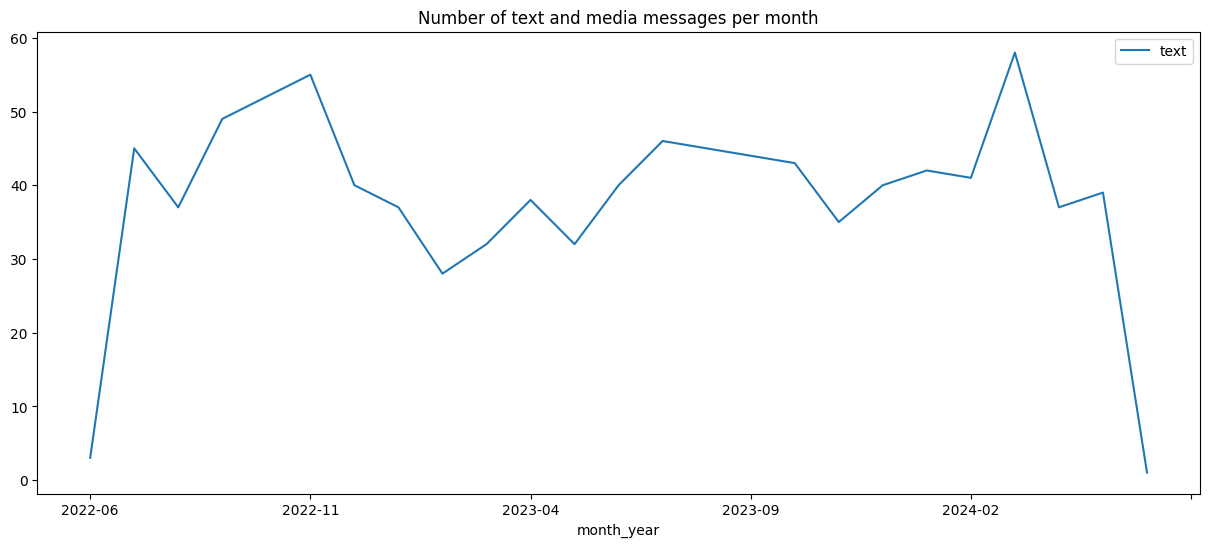

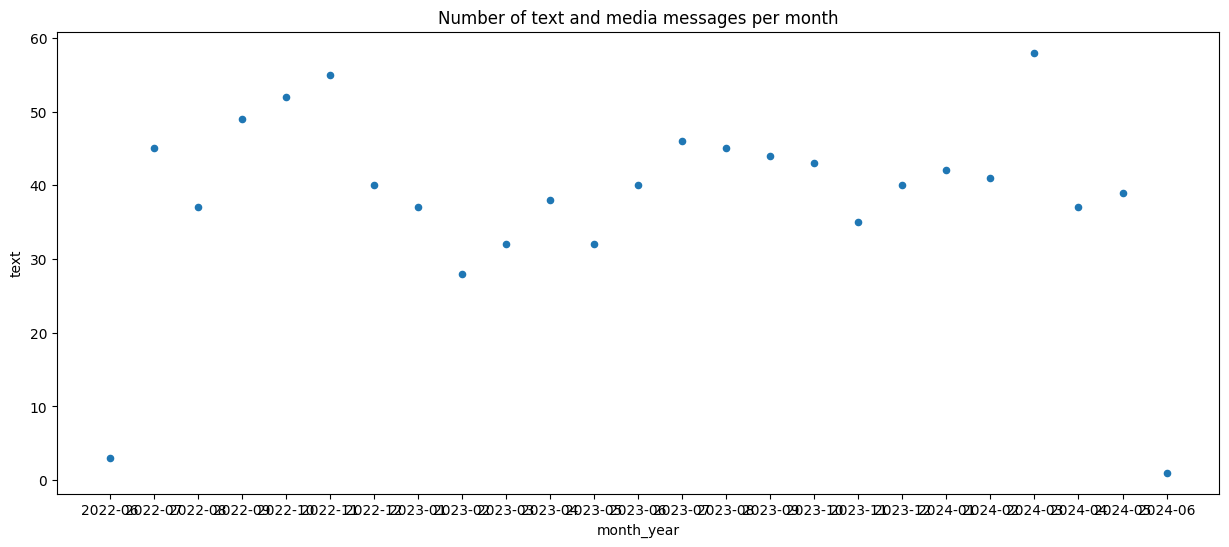

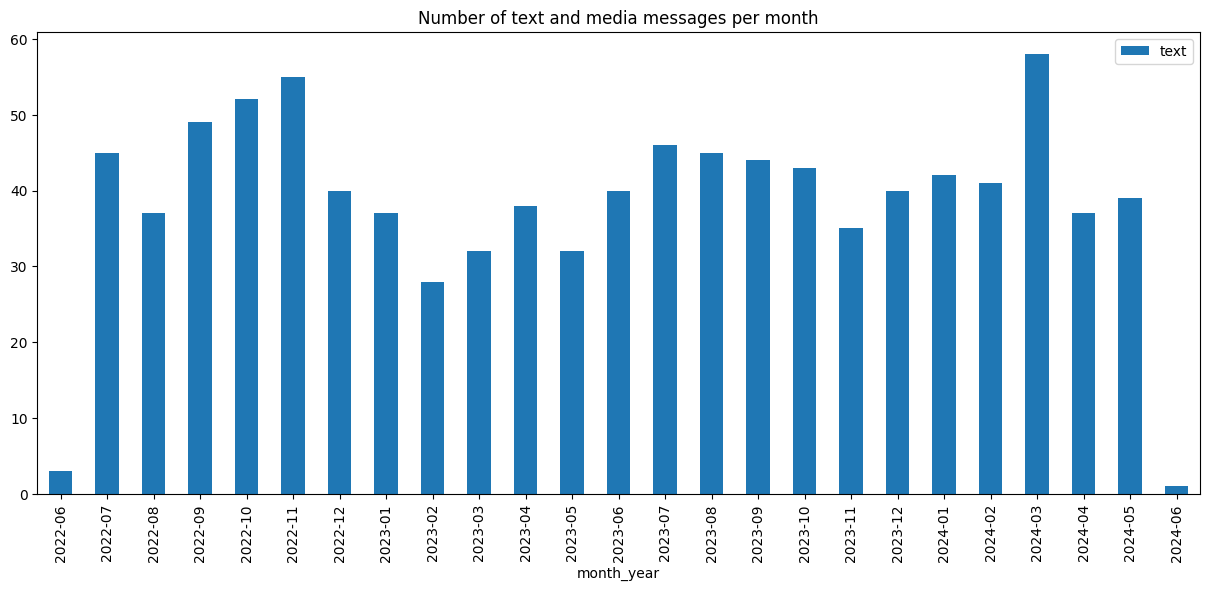

In [38]:
### TEXT + MEDIA in Messages ###

# group by month and year and count number of posts
df_count_text = df.groupby('month_year')['text'].count()
df_count_text = df_count_text.reset_index()

# create a line plot, where x-axis is the month and year and y-axis is the number of messages
df_count_text.plot.line(x='month_year', y='text', figsize=(15, 6), title='Number of text and media messages per month')

# plot with dots
df_count_text.plot(x='month_year', y='text', kind='scatter', figsize=(15, 6), title='Number of text and media messages per month')

# bar chart
df_count_text.plot.bar(x='month_year', y='text', figsize=(15, 6), title='Number of text and media messages per month')


In [119]:

import re
## Extract names from text 
df_ru_names = pd.read_csv('/Users/Oksana/Documents/ALEPH/RU/ru_tg_channels/telegram-api/ru_names.csv')       
names_list_male = df_ru_names['ru_male_name'].tolist()
names_list_female = df_ru_names['ru_female_name'].tolist()
names_list = names_list_male + names_list_female
print(names_list)
type(names_list)
# remove None values
names_list = [x for x in names_list if str(x) != 'nan']
#names_list = [x for x in names_list if str(x) != 'None']

['Александр', 'Андрей', 'Дмитрий', 'Иван', 'Сергей', 'Владимир', 'Николай', 'Павел', 'Алексей', 'Михаил', 'Евгений', 'Василий', 'Виктор', 'Анатолий', 'Юрий', 'Олег', 'Валерий', 'Константин', 'Борис', 'Вячеслав', 'Григорий', 'Артем', 'Денис', 'Игорь', 'Роман', 'Владислав', 'Антон', 'Тимофей', 'Петр', 'Геннадий', 'Никита', 'Станислав', 'Даниил', 'Федор', 'Леонид', 'Андреевич', 'Валентин', 'Максим', 'Семен', 'Матвей', 'Георгий', 'Илья', 'Аркадий', 'Ярослав', 'Александро', 'Егор', 'Кирилл', 'Влад', 'Савелий', 'Ефим', 'Женя', 'Марк', 'Виталий', 'Алексеевич', 'Филипп', 'Степан', 'Макар', 'Глеб', 'Лев', 'Вадим', 'Платон', 'Арсений', 'Мирон', 'Гавриил', 'Руслан', 'Радик', 'Лука', 'Тарас', 'Наум', 'Афанасий', 'Феликс', 'Эмиль', 'Артур', 'Тимур', 'Родион', 'Мирослав', 'Гордей', 'Яков', 'Вениамин', 'Назар', 'Эдуард', 'Давид', 'Ростислав', 'Валериан', 'Оскар', 'Марат', 'Тихон', 'Всеволод', 'Игнат', 'Захар', 'Варлам', 'Ринат', 'Аристарх', 'Исаак', 'Густав', 'Арсен', 'Дамир', 'Рустам', 'Мерген', 'Ба

In [126]:
### FIND MALE AND FEMALE NAMES IN TEXT ###

import re
## Extract names from text 
df_ru_names = pd.read_csv('/Users/Oksana/Documents/ALEPH/RU/ru_tg_channels/telegram-api/ru_names.csv')       
names_list_male = df_ru_names['ru_male_name'].tolist()
names_list_female = df_ru_names['ru_female_name'].tolist()
# remove None values
names_list_female = [x for x in names_list_female if str(x) != 'nan']
names_list = names_list_male + names_list_female

# Function to find names and surnames in text

def find_names(text, names_list):
    found_names = []
    for name in names_list:
        # Regex to find name possibly followed by a surname
        """
        not extracting a surname before a name, improve in the future
        """
        #pattern = r'\b' + re.escape(name) + r'\s+[А-Я][а-я]+' 
        #pattern = rf'\b{name}\b(?:\s+[А-Я][а-я]+)?'
        #pattern = rf'\b{name}\s+[А-Я][а-я]+'
        #pattern = rf'\b{name[:-1]}[а-яё]*\s+[А-ЯЁ][а-яё]+\b' # name + surname, helps with names with different endings
        #pattern = rf'\b{name[:-1]}[а-яё]*\s+[А-ЯЁ][а-яё]+\b'
        pattern = rf'\b{name[:-1]}[а-яё]*\s+[А-ЯЁ][а-яё]+\b'
        matches = re.findall(pattern, text)

        found_names.extend(matches)
    return found_names

# Apply the function to each row in df['text']
df['plain_text'] = df['plain_text'].fillna('')

df['extracted_names'] = df['plain_text'].apply(lambda x: find_names(x, names_list))

# Display the result
display(df.head(2))

df.to_csv('extracted_names_heroesOfZ_v6.csv', index=False)


,id,type,date,date_unixtime,actor,actor_id,action,title,text,text_entities,...,width,height,photo,forwarded_from,reply_to_message_id,time,month_year,plain_text,extracted_names,extracted_names_extended
1,3,message,2022-06-29T08:55:00,1656485700,NaN,NaN,NaN,NaN,"[Добро пожаловать на канал «, {'type': 'text_l...","[{'type': 'plain', 'text': 'Добро пожаловать н...",...,NaN,NaN,NaN,NaN,NaN,NaN,2022-06,Добро пожаловать на канал «Герои спецоперации ...,[],[]
2,4,message,2022-06-29T09:00:51,1656486051,NaN,NaN,NaN,NaN,"[«Работаем от души!», — так говорит командир а...","[{'type': 'plain', 'text': '«Работаем от души!...",...,480.0,480.0,NaN,NaN,NaN,NaN,2022-06,"«Работаем от души!», — так говорит командир аэ...",[Юрий Бровко],[]


In [114]:
import re

def find_ranked_names(text):
    found_ranked_names = []
    # Define common ranks in genitive case
    ranks = [
        'капитана', 'подполковника', 'лейтенанта', 'майора', 'полковника', 'генерала',
        'старшего лейтенанта', 'младшего лейтенанта', 'старшины', 'сержанта'
    ]
    
    for rank in ranks:
        # Regex to find rank followed by a surname
        pattern = rf'\b{rank}\s+[А-ЯЁ][а-яё]+(?:ова|ева|ина|ская|ий|ов|ев|ин|ский)\b'
        matches = re.findall(pattern, text)
        found_ranked_names.extend(matches)
    return found_ranked_names

df['extracted_names_extended'] = df['plain_text'].apply(lambda x: find_ranked_names(x))



In [ ]:
# Combine extracted names with extracted names_extended
df['extracted_names'] = df.apply(lambda row: row['extracted_names_extended'] if len(row['extracted_names']) == 0 else row['extracted_names'], axis=1)
